# Find patterns and extract simple information
In this notebook, I'll list out unique values of Time, Phone Number, Email, and Website and then use str.findall() function to extract these information.

## Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Load in data

### Data description

In [2]:
data = pd.read_csv('Hawaii_Farmer_s_Markets.csv')
data.head()

,FARMER'S MARKET,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,Location 1,Location Info,Island,Website,Contact,Phone,Email
0,Waialua Farmers' Market\nWaialua Sugar Mill\n8...,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MAUI FARMER’S MARKETS\nUpdated 3/1/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kekaha Neighborhood Center (Sunshine Markets)\...,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hali'imaile Farmers' Market\nHali'imaile Town ...,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mahiku Farmers' Market\nInternational Market P...,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have a bunch of missing data here. Note thate there're break lines \n in the first column.

In [3]:
#Rename some columns and get an overview of the dataframe
data = data.rename(columns={"FARMER'S MARKET": 'Name','Location 1':'Location'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 16 columns):
Name             225 non-null object
Sunday           47 non-null object
Monday           36 non-null object
Tuesday          52 non-null object
Wednesday        57 non-null object
Thursday         51 non-null object
Friday           58 non-null object
Saturday         92 non-null object
Time             122 non-null object
Location         102 non-null object
Location Info    59 non-null object
Island           138 non-null object
Website          52 non-null object
Contact          64 non-null object
Phone            93 non-null object
Email            24 non-null object
dtypes: object(16)
memory usage: 28.9+ KB


In [4]:
#Drop duplicates if available and check for the data length
data = data.drop_duplicates()
len(data.index)

228

## Missing values
Let's have a visualization to see how many missing data we have here.

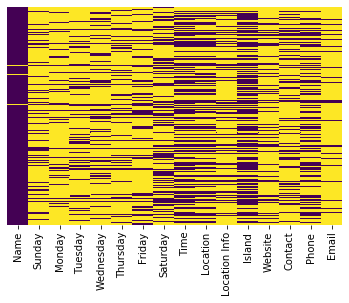

In [5]:
sns.heatmap(data.isna(), cmap='viridis', cbar=False, yticklabels=False)

That's a lot. Note that we have 3 missing names.

In [6]:
#Display rows that have missing Name
data[data['Name'].isna()]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,Location,Location Info,Island,Website,Contact,Phone,Email
61,NaN,Sun,Mon,Tues,Wed,Thurs,Fri,Sat,Time,"Address\nCity, State Zip",Location Info,Website,NaN,Phone,Email,NaN
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.\nBIG ISLAND FARMER’S MARKETS Updated 01/10/2011,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,Sun,Mon,Tues,Wed,Thurs,Fri,Sat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These look like headers of different tables. I guess the dataframe was appended more than once with other data. It would be suspicious if a row does not have weekday schedule information.<br>
Let's see if we have missing values in all weekdays.

In [7]:
#Display rows that have missing all weekdays
data[data.iloc[:,1:8].isna().all(axis=1)]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,Location,Location Info,Island,Website,Contact,Phone,Email
1,MAUI FARMER’S MARKETS\nUpdated 3/1/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,KAUAI FARMER’S MARKETS\nUpdated 3/15/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.\nBIG ISLAND FARMER’S MARKETS Updated 01/10/2011,NaN,NaN,NaN,NaN,NaN,NaN
191,OAHU FARMER'S MARKETS\nUpdated 5/22/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we actually see that the data were updated, and it looks like the data were updated by Island. Let's check Island value from a certain set, Maui for example.

In [8]:
data.loc[1:45]['Island'].unique()

array([nan, 'Oahu', 'www.co.honolulu.hi.us/parks/programs/pom ', 'Hawaii',
       'Kauai', 'Maui'], dtype=object)

Other than Maui, this set contains Ohau and Kauai as well. So we cannot trust in the data order. I'll drop these values then.

In [9]:
data = data.dropna(subset=['Name'])
data.drop([1,46,191], inplace=True)

We can see that the data have break lines. I would like to check which columns have break lines.

In [10]:
print('Columns that have break lines:')
for col in data:
    if (data[col].str.contains(r'\n', na=False)).any() == True:
        print(col + ': ' + str(data[col].str.contains(r'\n', na=False).sum()) +
              ' record(s). Max: ' + str(data[col].str.count(r'\n').max()) + ' ocurrence(s)')

Columns that have break lines:
Name: 115 record(s). Max: 7 ocurrence(s)
Tuesday: 1 record(s). Max: 1.0 ocurrence(s)
Wednesday: 2 record(s). Max: 1.0 ocurrence(s)
Location: 86 record(s). Max: 2.0 ocurrence(s)
Island: 1 record(s). Max: 1.0 ocurrence(s)
Contact: 1 record(s). Max: 1.0 ocurrence(s)
Phone: 1 record(s). Max: 1.0 ocurrence(s)


Mostly Name and Location have break lines. We can make a quick check for other columns.

In [11]:
data[data['Tuesday'].str.contains(r'\n', na=False) |
     data['Wednesday'].str.contains(r'\n', na=False) |
     data['Island'].str.contains(r'\n', na=False) |
     data['Contact'].str.contains(r'\n', na=False) |
     data['Phone'].str.contains(r'\n', na=False) ]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,Location,Location Info,Island,Website,Contact,Phone,Email
36,Davies Pacific Center,NaN,NaN,X\n*2nd & 4th,NaN,NaN,NaN,NaN,10:00 AM - 1:00 PM,841 Bishop Street,*2nd & 4th Tuesdays,NaN,NaN,NaN,NaN,NaN
54,Ala Moana Farmers' Market,NaN,NaN,NaN,NaN,NaN,NaN,X,9:00 AM to 1:00 PM,"1450 Ala Moana Blvd.\nHonolulu, HI\n(21.289280...","Ala Moana Center, upper deck by Sears, corner ...",\nhttp://alamoanafarmersmarket.com/ala-moana.html,NaN,808-388-9696\n,AlaMoanaFarmersMarket@gmail.com,NaN
57,"Queen's Medical Center\n1301 Punchbowl Street,...",NaN,NaN,NaN,X\n1st Wed.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,"First Insurance Center\n1100 Ward Ave., Honolu...",NaN,NaN,NaN,X\n*1st & 3rd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,Ala Moana Farmers' Market,NaN,NaN,NaN,NaN,NaN,NaN,X,9:00 AM to 1:00 PM,"1450 Ala Moana Blvd.\nHonolulu, HI\n(21.289280...","Ala Moana Center, upper deck by Sears, corner ...",Oahu,http://alamoanafarmersmarket.com/ala-moana.html,NaN,808-388-9696\n,AlaMoanaFarmersMarket@gmail.com


This is not too bad. I can manually change these values.

In [12]:
data.loc[36]['Tuesday'] = 'X'
data.loc[57]['Wednesday'] = 'X'
data.loc[57]['Location Info'] = '1st Wed.'
data.loc[130]['Wednesday'] = 'X'
data.loc[130]['Location Info'] = '1st & 3rd'

Let's strip the data, and replace blanks with Nans.

In [13]:
data[data.columns] = data.apply(lambda x: x.str.strip('\n'))
data[data.columns] = data.apply(lambda x: x.str.strip('*'))
data[data.columns] = data.apply(lambda x: x.str.strip(' '))
data.replace('^\s*$', np.nan, regex=True, inplace = True)

For Name and Location rows that have break lines, I would like to know if other columns from these rows are missing or not.

In [14]:
print('For Name values that have break lines: ' +
      str(data['Name'].str.contains(r'\n', na=False).sum()) + ' records')
for col in data.iloc[:,8:15]:
    print('Number of non-missing values in ' + col + ': ' +
          str(np.where(data['Name'].str.contains(r'\n', na=False),data[col].notna(),0).sum()))

For Name values that have break lines: 113 records
Number of non-missing values in Time: 12
Number of non-missing values in Location: 3
Number of non-missing values in Location Info: 2
Number of non-missing values in Island: 31
Number of non-missing values in Website: 1
Number of non-missing values in Contact: 25
Number of non-missing values in Phone: 8


We have a really messy data here!

## Build Regex

In this part, I will use Regex to extract pattern of Time, Website, Email, and Phone. The goal is to use extracted information to fill in missing values.

### Time
#### Check pattern and extract information

In [15]:
#List all unique values to find the pattern.
data['Time'].unique().tolist()

[nan,
 '9:00 AM to 4:00PM',
 '10:00 AM to 2:00 PM',
 '4:00 PM to 8:00 PM',
 '7:00 AM to 12:00 NOON',
 '8:15 AM to 9:15 AM',
 '7:00 AM to 12:00 PM',
 '3:00 PM',
 '10:45 AM to 11:45 AM',
 '9:00 AM to 1:00 PM',
 '7:00 AM to 2:00 PM',
 '7:00AM to 5:00PM',
 '3:00 PM to 7:00 PM',
 '8:00 AM to 12:00 NOON',
 '8:00 AM to 2:00 PM',
 '7:00 AM to 1:00 PM',
 '7:00 AM to 3:00 PM',
 '9:30 AM -   2:00 PM',
 '10:00 AM - 1:00 PM',
 '9:00 AM',
 '10:00 AM - 4:00 PM',
 '9:00 AM to 2:00 PM',
 '9:00 AM to 10:00 AM',
 '10:00 AM to 1:00 PM',
 '3:00 PM to 6:30 PM',
 '4:30 PM to 7:30 PM',
 '7:00 AM to 8:00 AM',
 '8:00 AM - 1:00 PM',
 '6:15 AM to 7:30 AM',
 '8:00 AM to 1:00 PM',
 '4:00 PM to 7:00 PM',
 '8:30 AM to 9:30 AM',
 '7:30 AM to 1:00 PM',
 '11:30 AM to 12:30 PM',
 '7:00 AM - 12:00 NOON',
 '7:00 AM to 11:00 AM',
 '7:00 AM to 4:00 PM',
 '12:30 PM to 5:30 PM',
 '8:00 AM - 12:00 NOON',
 '11:15 AM to 12:00 Noon',
 '6:45 AM to 7:45 AM',
 '5:00 PM to 7:30 PM',
 '10:15 AM to 11:00 AM',
 '2:00 PM to 5:00 PM',
 '7:

The Regex for time is:

```
\d{1,2}(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon)
(?:\s{1,}?(?:to|-)\s{1,})?
(?:\d{1,2}(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon))?
```

In [16]:
#Check which columns have time pattern.
print('Columns that have time information:')
for col in data:
    if (data[col].str.contains('\d{1,2}(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon)'\
                               '(?:\s{1,}?(?:to|-)\s{1,})?(?:\d{1,2}'     \
                               '(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon))?', na=False)).any() == True:
        print(col + ': max ' + str(data[col].str.count(
                                   '\d{1,2}(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon)'\
                                   '(?:\s{1,}?(?:to|-)\s{1,})?(?:\d{1,2}'     \
                                   '(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon))?').max()) + ' occurence(s)')

Columns that have time information:
Name: max 2 occurence(s)
Time: max 2.0 occurence(s)


In [17]:
#Check if both Name and Time have time pattern in one row.
(data['Name'].str.contains('\d{1,2}(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon)'\
                           '(?:\s{1,}?(?:to|-)\s{1,})?(?:\d{1,2}'     \
                           '(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon))?', na=False) &
 data['Time'].str.contains('\d{1,2}(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon)'\
                           '(?:\s{1,}?(?:to|-)\s{1,})?(?:\d{1,2}'     \
                           '(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon))?', na=False)).any()

False

In [18]:
#Replace data in Time column with extracted time pattern.
data['Time'] = np.where(data['Name'].str.contains(
                        '\d{1,2}(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon)'\
                        '(?:\s{1,}?(?:to|-)\s{1,})?(?:\d{1,2}'     \
                        '(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon))?', na=False),
                        data['Name'].str.findall(
                        '\d{1,2}(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon)'\
                        '(?:\s{1,}?(?:to|-)\s{1,})?(?:\d{1,2}'     \
                        '(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon))?').apply(lambda x: ', '.join(set(x))),
                        data['Time'])

#### Format
In this part, I will format all time values.

In [19]:
#Recheck time column
data['Time'].unique().tolist()

['8:30 AM to 12:00 Noon',
 '9 AM',
 '1:00 PM - 6:00 PM',
 '4:00 PM - 8:00 PM',
 '9:00 AM to 4:00PM',
 '7:30 AM to 3:00 PM',
 '10:00 AM to 2:00 PM',
 '11:00 AM to 11:45 AM',
 '4:00 PM to 8:00 PM',
 '7:00 AM to 12:00 NOON',
 '11:15 AM to 12:00 Noon',
 '8:15 AM to 9:15 AM',
 '7:00 AM to 12:00 PM',
 '7:30 AM to 1:00 PM',
 '7:00 AM to 4:00 PM',
 '3:00 PM',
 '10:45 AM to 11:45 AM',
 '9:00 AM to 1:00 PM',
 '12:30 PM to 5:30 PM',
 '7:00 AM to 2:00 PM',
 '8:00 AM to 5:00 PM',
 '7:00AM to 5:00PM',
 '3:00 PM to 7:00 PM',
 '10:15 AM to 11:00 AM',
 '8:00 AM to 12:00 NOON',
 '8:00 AM to 2:00 PM',
 '7:00 AM to 1:00 PM',
 '7:00 AM to 3:00 PM',
 '2:00 PM to 5:00 PM',
 '9:30 AM -   2:00 PM',
 '10:00 AM - 1:00 PM',
 '9:00 AM',
 '10:00 AM - 4:00 PM',
 '9:00 AM to 2:00 PM',
 '9:00 AM to 10:00 AM',
 '10:00 AM to 1:00 PM',
 '7:00 AM to 11:00 AM',
 '5:00 PM to 7:30 PM',
 '7:00 AM to 8:00 AM',
 '3:00 PM to 6:30 PM',
 '4:30 PM to 7:30 PM',
 '8:00 AM to 1:00 PM',
 '4:00 PM to 7:00 PM',
 '3:00 PM to 8:00 PM',
 '1

Next, I will extract time part (hour, minute, part of day then combine them as a formatted form.

In [20]:
#Extract time part to a data frame
data_time = data['Time'].str.extractall('(\d{1,2})\W?(\d{2})?\s?(AM|PM|NOON|Noon)'
                                        '(?:(\s{1,}?(?:to|-)\s{1,})?(\d{1,2})\W?'
                                        '(\d{2})?\s?(AM|PM|NOON|Noon)?)?')

In [21]:
#Replace Nans with 00 and Noon with PM
data_time.replace(np.nan,'00',inplace=True)
data_time.replace('NOON','PM',inplace=True)
data_time.replace('Noon','PM',inplace=True)

In [22]:
data_time.head()

,,0,1,2,3,4,5,6
,match,,,,,,,
0,0,8,30,AM,to,12,00,PM
2,0,9,00,AM,00,00,00,00
3,0,1,00,PM,-,6,00,PM
4,0,4,00,PM,-,8,00,PM
5,0,9,00,AM,to,4,00,PM


So we might have both opening and closing time (8:30 AM to 12:00 PM), or just opening time (9:00 AM) in a row. We also might have more than one time frame in a row. First, I combine these values into desired format.

In [23]:
#Combine and rewrite these parts to formated values.
data_time['Time'] = np.where(data_time[3] == '00',
                             data_time[0] + ':' + data_time[1] + ' ' + data_time[2],
                             data_time[0] + ':' + data_time[1] + ' ' + data_time[2] + \
                             ' to ' + data_time[4] + ':' + data_time[5] + ' ' + data_time[6])

In [24]:
data_time.head()

,,0,1,2,3,4,5,6,Time
,match,,,,,,,,
0,0,8,30,AM,to,12,00,PM,8:30 AM to 12:00 PM
2,0,9,00,AM,00,00,00,00,9:00 AM
3,0,1,00,PM,-,6,00,PM,1:00 PM to 6:00 PM
4,0,4,00,PM,-,8,00,PM,4:00 PM to 8:00 PM
5,0,9,00,AM,to,4,00,PM,9:00 AM to 4:00 PM


Looks good! Since I want to join these information into our dataframe, I'll need to group these data by index (first level) and join unique values for each index.

In [25]:
#Group data by index and join unique values, then create a new dataframe
data_time = data_time.groupby(level=[0]).agg(lambda x: ', '.join(set(x)))['Time']
data_time = pd.DataFrame(data_time)

In [26]:
#Join with the original dataframe
data = data.join(data_time,rsuffix='_group')

In [27]:
#Replace old Time column with extracted values
data['Time'] = data['Time_group']
data.drop('Time_group',axis=1,inplace=True)

I'll go over the same steps for Website, Phone, and Email columns

### Website
#### Check pattern and extract information

In [28]:
#List all unique values to find the pattern
data['Website'].unique().tolist()

[nan,
 'http://www.co.honolulu.hi.us/parks/programs/pom',
 'http://www.mahikufarmersmarket.com',
 'http://www.hfbf.org',
 'http://www.hilofarmersmarket.com',
 'http://makawaofarmersmarket.org/',
 'http://www.lahainaproduce.com',
 'http://www.skgm.org',
 'http://www.wardcenters.com',
 'http://www.northshorecountrymarket.com',
 'http://www.haleiwafarmersmarket.com',
 'http://www.kings-village.com',
 'http://www.windwardmall.com/event/farmers-market-every-Wednesday',
 'http://alamoanafarmersmarket.com/ala-moana.html',
 'http://www.halehalawai.org/market.htm',
 'http://www.makekeomaunalua.com',
 'http://www.local-farmers-markets.com/market/1162/honolulu/fort-street-near-wilcox-park',
 'http://www.waianaefarmersmarket.org',
 'http://www.KakaakoMakaiMarket.com']

The Regex for website is:
```
(?:(?:(?:https?://)?(?:www.))|(?:(?:https?://)(?:www.)?))[\w\-.~:/?#\[\]@!$&'()*+,;=%]+
```

In [29]:
#Check which columns have time pattern
print('Columns that have website information:')
for col in data:
    if (data[col].str.contains("(?:(?:(?:https?://)?(?:www.))|(?:(?:https?://)(?:www.)?))" \
                               "[\w\-.~:/?#\[\]@!$&'()*+,;=%]+", na=False)).any() == True:
        print(col + ': max ' + str(data[col].str.count(
                                   "(?:(?:(?:https?://)?(?:www.))|(?:(?:https?://)(?:www.)?))" \
                                   "[\w\-.~:/?#\[\]@!$&'()*+,;=%]+").max()) + ' occurence(s)')

Columns that have website information:
Name: max 2 occurence(s)
Island: max 1.0 occurence(s)
Website: max 1.0 occurence(s)
Phone: max 1.0 occurence(s)


In [30]:
#Check if these rows have website information only when there're missing values in Website column
print('All rows that have website information in these columns have missing data in Website column:')
for col in data[['Name','Island','Phone']]:
    print(col + ': ' +
          str(data[data[col].str.contains(
              "(?:(?:(?:https?://)?(?:www.))|(?:(?:https?://)(?:www.)?))" \
              "[\w\-.~:/?#\[\]@!$&'()*+,;=%]+", na=False)]['Website'].isna().all()))

All rows that have website information in these columns have missing data in Website column:
Name: True
Island: True
Phone: True


In [31]:
#Check if there're rows that have website information in two columns at the same time#
print('These two columns have website pattern in same rows:')
for (col1,col2) in zip(data[['Name','Name','Name','Island','Island','Website']],
                       data[['Island','Website','Phone','Website','Phone','Phone']]):
    print(col1 + ' and ' + col2 + ': ' +
          str((data[col1].str.contains(
              "(?:(?:(?:https?://)?(?:www.))|(?:(?:https?://)(?:www.)?))" \
              "[\w\-.~:/?#\[\]@!$&'()*+,;=%]+", na=False) &
              data[col2].str.contains(
              "(?:(?:(?:https?://)?(?:www.))|(?:(?:https?://)(?:www.)?))" \
              "[\w\-.~:/?#\[\]@!$&'()*+,;=%]+", na=False)).any()))

These two columns have website pattern in same rows:
Name and Island: True
Name and Website: False
Name and Phone: False
Island and Website: False
Island and Phone: False
Website and Phone: False


So Name and Island have website information at the same time. We can check this after fill in website missing values with extracted information from Name column.

In [32]:
#Fill in Website column with extracted website pattern from Name column:
data['Website'] = np.where(data['Name'].str.contains(
                           "(?:(?:(?:https?://)?(?:www.))|(?:(?:https?://)(?:www.)?))" \
                           "[\w\-.~:/?#\[\]@!$&'()*+,;=%]+", na=False),
                           data['Name'].str.findall(
                           "(?:(?:(?:https?://)?(?:www.))|(?:(?:https?://)(?:www.)?))" \
                           "[\w\-.~:/?#\[\]@!$&'()*+,;=%]+").apply(lambda x: ', '.join(set(x))),
                           data['Website'])

In [33]:
#Check how these values overlap Island:
data[data['Island'].str.contains(r"(?:(?:(?:https?://)?(?:www.))|(?:(?:https?://)(?:www.)?))" \
                                 r"[\w\-.~:/?#\[\]@!$&'()*+,;=%]+", na=False)][['Website','Island']]

,Website,Island
8,www.co.honolulu.hi.us/parks/programs/pom,www.co.honolulu.hi.us/parks/programs/pom
11,www.co.honolulu.hi.us/parks/programs/pom,www.co.honolulu.hi.us/parks/programs/pom
26,www.co.honolulu.hi.us/parks/programs/pom,www.co.honolulu.hi.us/parks/programs/pom
44,www.co.honolulu.hi.us/parks/programs/pom,www.co.honolulu.hi.us/parks/programs/pom
51,www.co.honolulu.hi.us/parks/programs/pom,www.co.honolulu.hi.us/parks/programs/pom
54,NaN,http://alamoanafarmersmarket.com/ala-moana.html
72,www.co.honolulu.hi.us/parks/programs/pom,www.co.honolulu.hi.us/parks/programs/pom
76,www.co.honolulu.hi.us/parks/programs/pom,www.co.honolulu.hi.us/parks/programs/pom
84,www.co.honolulu.hi.us/parks/programs/pom,www.co.honolulu.hi.us/parks/programs/pom
85,www.co.honolulu.hi.us/parks/programs/pom,www.co.honolulu.hi.us/parks/programs/pom


So the overlapped values are the same. We can go ahead and fill in missing website values with information extracted from Island and Phone columns.

In [34]:
#Fill in missing website information with pattern extracted from Island and Phone:
#Replace website pattern in Island and Phone column with Nan:
for col in data[['Island','Phone']]:
    data['Website'] = np.where(data[col].str.contains(
                               "(?:(?:(?:https?://)?(?:www.))|(?:(?:https?://)(?:www.)?))" \
                               "[\w\-.~:/?#\[\]@!$&'()*+,;=%]+", na=False),
                               data[col].str.findall(
                               "(?:(?:(?:https?://)?(?:www.))|(?:(?:https?://)(?:www.)?))" \
                               "[\w\-.~:/?#\[\]@!$&'()*+,;=%]+").str[0],
                               data['Website'])
    data[col] = np.where(data[col] == data['Website'],np.nan,data[col])

#### Format

In [35]:
#Recheck Website column
data['Website'].unique().tolist()

[nan,
 'www.mahikufarmersmarket.com',
 'www.co.honolulu.hi.us/parks/programs/pom',
 'http://www.co.honolulu.hi.us/parks/programs/pom',
 'http://www.mahikufarmersmarket.com',
 'http://www.hfbf.org',
 'http://www.hilofarmersmarket.com',
 'http://makawaofarmersmarket.org/',
 'http://www.lahainaproduce.com',
 'http://www.skgm.org',
 'www.hfbf.org',
 'www.wardcenters.com',
 'www.windwardmall.com/event/farmers-market-every-Wednesday',
 'http://alamoanafarmersmarket.com/ala-moana.html',
 'www.haleiwafarmersmarket.com',
 'http://www.wardcenters.com',
 'http://www.northshorecountrymarket.com',
 'www.farmfreshhawaii.com',
 'http://www.haleiwafarmersmarket.com',
 'www.hilofarmersmarket.com',
 'www.makekeomaunalua.com',
 'http://www.kings-village.com',
 'http://www.windwardmall.com/event/farmers-market-every-Wednesday',
 'http://www.halehalawai.org/market.htm',
 'www.halehalawai.org/market.htm',
 'http://www.makekeomaunalua.com',
 'www.skgm.org',
 'http://www.local-farmers-markets.com/market/1162/

There's inconsistent pattern. Let's strip the data.

In [36]:
data['Website'] = data['Website'].str.strip(r'http://')

### Email
#### Check pattern and extract information

In [37]:
#List all unique value
data['Email'].unique().tolist()

[nan,
 'dewell@hawaii.rr.com',
 'sonnydoung@hotmail.com',
 'gagner001@hawaii.rr.com',
 'dpcinfo@isleconcierge.com',
 'georgelee2468@gmail.com',
 'kcfb@hawaiiantel.ne',
 'info@upcountryfarmersmarket.com',
 'keala.ching@outrigger.com',
 'bifb@hawaiiantel.net',
 'haleiwafarmersmarket@gmail.com',
 'nkona@hawaii.rr.com',
 'AlaMoanaFarmersMarket@gmail.com',
 'info@sugarmillhawaii.com',
 'drozemond@castlecooke.com',
 'kekahuna@localnet.com',
 'waianaefarmersmarket@wcchc.com',
 'nuuanumarket@gmail.com',
 'bethflo@hotmail.com']

The Regex for email is:
```
[\w\.-]+@[\w\.-]+
```

In [38]:
#Check which columns contain the pattern
print('Columns that have email information:')
for col in data:
    if (data[col].str.contains('[\w\.-]+@[\w\.-]+')).any() == True:
        print(col + ': max ' + str(data[col].str.count(
                                   '[\w\.-]+@[\w\.-]+').max()) + ' occurence(s)')

Columns that have email information:
Name: max 1 occurence(s)
Phone: max 1.0 occurence(s)
Email: max 1.0 occurence(s)


In [39]:
#Check if these rows have email information only when there're missing values in Email column
print('All rows that have email information in these columns have missing data in Email column:')
for col in data[['Name','Phone']]:
    print(col + ': ' + str(data[data[col].str.contains(
                           '[\w\.-]+@[\w\.-]+', na=False)]['Email'].isna().all()))

All rows that have email information in these columns have missing data in Email column:
Name: True
Phone: True


In [40]:
#Check if Name and Phone have email information in same rows:
print('Name and Phone have email information in same rows: ' +
str((data['Name'].str.contains('[\w\.-]+@[\w\.-]+', na=False) &
     data['Phone'].str.contains('[\w\.-]+@[\w\.-]+', na=False)).any()))

Name and Phone have email information in same rows: False


In [41]:
#Replace missing email values with extracted information from Phone column
for col in data[['Name','Phone']]:
    data['Email'] = np.where(data[col].str.contains(
                             '[\w\.-]+@[\w\.-]+', na=False),
                             data[col].str.findall('[\w\.-]+@[\w\.-]+').str[0],
                             data['Email'])

In [42]:
#Replace email pattern in Phone column with Nan:
data['Phone'] = np.where(data['Phone'] == data['Email'],np.nan,data['Phone'])

#### Format

In [43]:
data['Email'].unique().tolist()

['info@sugarmillhawaii.com',
 nan,
 'sonnydoung@hotmail.com',
 'dewell@hawaii.rr.com',
 'keala.ching@outrigger.com',
 'gagner001@hawaii.rr.com',
 'dpcinfo@isleconcierge.com',
 'georgelee2468@gmail.com',
 'AlaMoanaFarmersMarket@gmail.com',
 'haleiwafarmersmarket@gmail.com',
 'kcfb@hawaiiantel.ne',
 'info@upcountryfarmersmarket.com',
 'bifb@hawaiiantel.net',
 'nkona@hawaii.rr.com',
 'wfpinfo@isleconcierge.com',
 'bethflo@hotmail.com',
 'nuuanumarket@gmail.com',
 'drozemond@castlecooke.com',
 'kekahuna@localnet.com',
 'waianaefarmersmarket@wcchc.com',
 'kcfb@hawaiiantel.net']

There's nothing strange in the format general. So I'll leave it this way.

### Phone
#### Check pattern and extract information

In [44]:
#List all unique values
data['Phone'].unique().tolist()

[nan,
 '(808) 259-8611, Cell: (808) 284-2575',
 '(808) 522-7088',
 '(808) 929-7239',
 '(808) 225-4002',
 '(808) 742-1834',
 '(808) 333-2478',
 '(808) 848-2074',
 'sonnydoung@hotmail.com  www.mahikufarmersmarket.com',
 '(808) 933-1000',
 '808-419-1570',
 '(808) 328-2400',
 '(808) 545-4477',
 '(808) 697-3599 or 692-8200 ext. 2267',
 '(808) 735-4550',
 '(808) 968-1333',
 '(808) 337-9944',
 '(808) 237-8248',
 '(808) 669-7004',
 '(808) 871-1307',
 '(808) 324-2540',
 '(808) 887-0023',
 '(808) 557-2780',
 '(808) 388-9696',
 '(808) 877-4325',
 '(808) 463-1676',
 '(808) 248-7515 ext. 26',
 '(808) 822-5887',
 '(808) 322-3118, (808) 322-2362',
 '(808) 237-6340',
 '(808) 923-1802',
 '(808) 334-1381',
 '808-388-9696',
 '(808) 248-7779',
 '(808) 965-9205',
 '(808) 826-1011',
 '(808) 959-0488',
 '(808) 847-0494 Cell: (808) 554-4667',
 '(808) 877-3100',
 '(808) 965-1441, (808) 896-5537, (Cell) (808) 217-2307',
 '(808) 322-0718',
 '(808) 875-0949',
 '(808) 966-4853',
 '(808) 396-0766',
 '(808) 967-7209

The Regex for phone is:
```
\(?\d{3}\)?\W?\d{3}\W\d{4}
```

In [45]:
#Check which columns have phone information
print('Columns that have phone information:')
for col in data:
    if (data[col].str.contains('\(?\d{3}\)?\W?\d{3}\W\d{4}')).any() == True:
        print(col + ': max ' + str(data[col].str.count(
                                   '\(?\d{3}\)?\W?\d{3}\W\d{4}').max()) + ' occurence(s)')

Columns that have phone information:
Name: max 3 occurence(s)
Contact: max 1.0 occurence(s)
Phone: max 3.0 occurence(s)


In [46]:
#Check if these rows have phone information only when there're missing values in Phone column
print('All rows that have phone information in these columns have missing data in Phone column:')
for col in data[['Name','Contact']]:
    print(col + ': ' + str(data[data[col].str.contains(
                           '\(?\d{3}\)?\W?\d{3}\W\d{4}', na=False)]['Phone'].isna().all()))

All rows that have phone information in these columns have missing data in Phone column:
Name: True
Contact: False


So Contact and Phone columns have phone information in same rows.

In [47]:
#Check if Name and Contact have phone information in same rows
print('Name and Contact have phone information in same rows: ' +
str((data['Name'].str.contains('\(?\d{3}\)?\W?\d{3}\W\d{4}', na=False) &
     data['Email'].str.contains('\(?\d{3}\)?\W?\d{3}\W\d{4}', na=False)).any()))

Name and Contact have phone information in same rows: False


Now we can fill in missing phone values with extracted information from Name column.

In [48]:
#Fill in Phone column with extracted phone pattern from Name column:
data['Phone'] = np.where(data['Name'].str.contains('\(?\d{3}\)?\W?\d{3}\W\d{4}', na=False),
                         data['Name'].str.findall('\(?\d{3}\)?\W?\d{3}\W\d{4}').apply(lambda x: ', '.join(set(x))),
                         data['Phone'])

Let's see which Contact information have phone pattern, and does it matter?

In [49]:
data[data['Contact'].str.contains('\(?\d{3}\)?\W?\d{3}\W\d{4}', na=False)][['Phone','Contact']]

,Phone,Contact
8,(808) 522-7088,(808) 522-7088
11,(808) 522-7088,(808) 522-7088
26,(808) 522-7088,(808) 522-7088
28,sonnydoung@hotmail.com www.mahikufarmersmarke...,(808) 225-4002
44,(808) 522-7088,(808) 522-7088
51,(808) 522-7088,(808) 522-7088
54,NaN,808-388-9696
72,(808) 522-7088,(808) 522-7088
76,(808) 522-7088,(808) 522-7088
84,(808) 522-7088,(808) 522-7088


So there're still some rows in Phone column that can be replaced by information from Contact.

In [50]:
#Fill in missing phone information with pattern extracted from Phone:
data['Phone'] = np.where(data['Contact'].str.contains('\(?\d{3}\)?\W?\d{3}\W\d{4}', na=False),
                         data['Contact'].str.findall('\(?\d{3}\)?\W?\d{3}\W\d{4}').str[0],
                         data['Phone'])

Since we already extracted email and website information. We can do this step.

In [51]:
#Replace phone pattern in Contact column with Nan:
data['Contact'] = np.where(data['Contact'] == data['Phone'],np.nan,data['Contact'])

### Format

In [52]:
#Recheck Phone column
data['Phone'].unique().tolist()

[nan,
 '(808) 742-1834',
 '(808) 225-4002',
 '(808) 259-8611, Cell: (808) 284-2575',
 '(808) 396-0766',
 '(808) 522-7088',
 '(808) 929-7239',
 '(808) 871-1307',
 '(808) 324-2540',
 '(808) 968-8631',
 '(808) 959-0488',
 '(808) 333-2478',
 '(808) 848-2074',
 '(808) 933-1000',
 '(808) 887-0023',
 '808-419-1570',
 '(808) 328-2400',
 '(808) 545-4477',
 '(808) 554-4667, (808) 847-0494',
 '(808) 697-3599 or 692-8200 ext. 2267',
 '(808) 735-4550',
 '808-388-9696',
 '(808) 968-1333',
 '(808) 388-9696',
 '(808) 337-9944',
 '(808) 822-1712',
 '(808) 875-0949',
 '(808) 237-8248',
 '(808) 669-7004',
 '(808) 328-8547',
 '(808) 298-4289',
 '(808) 259-8611, (808) 259-7602, (808) 284-2575',
 '(808) 557-2780',
 '(808) 877-4325',
 '(808) 322-2362, (808) 322-3118',
 '(808) 463-1676',
 '(808) 966-4853',
 '(808) 537-5158',
 '(808) 248-7515 ext. 26',
 '(808) 822-5887',
 '(808) 322-0718',
 '(808) 322-3118, (808) 322-2362',
 '(808) 443-1679',
 '(808) 237-6340',
 '(808) 923-1802',
 '(808) 697-3599',
 '(808) 334

I'll apply the same method as Time column to get consistent format for Phone column.

In [53]:
data_phone = data['Phone'].str.extractall('\(?(\d{3})\)?\W?(\d{3})\W(\d{4})')

In [54]:
data_phone.head()

0    1     2
  match                
2 0      808  742  1834
4 0      808  225  4002
5 0      808  259  8611
  1      808  284  2575
6 0      808  396  0766

In [55]:
data_phone['Phone'] = '(' + data_phone[0] + ')' + ' ' + data_phone[1] + '-' + data_phone[2]

In [56]:
data_phone.head()

0    1     2           Phone
  match                                
2 0      808  742  1834  (808) 742-1834
4 0      808  225  4002  (808) 225-4002
5 0      808  259  8611  (808) 259-8611
  1      808  284  2575  (808) 284-2575
6 0      808  396  0766  (808) 396-0766

In [57]:
data_phone = data_phone.groupby(level=[0]).agg(lambda x: ', '.join(set(x)))['Phone']
data_phone = pd.DataFrame(data_phone)

In [58]:
data = data.join(data_phone,rsuffix='_group')

In [59]:
data['Phone'] = data['Phone_group']
data.drop('Phone_group',axis=1,inplace=True)

## Split strings that have break lines

As we saw above, there're maximum 7 \n in Name column, so I will split Name into 8 columns. For Location, that would be 3 columns.

In [60]:
data[['Name','col1','col2','col3','col4','col5','col6','col7']] = data['Name'].str.split(r'\n', expand=True)
data[['Location','col8','col9']] = data['Location'].str.split(r'\n', expand=True)

Strip the dataframe and replace blanks with Nans.

In [61]:
data[data.columns] = data.apply(lambda x: x.str.strip('\n'))
data[data.columns] = data.apply(lambda x: x.str.strip('*'))
data[data.columns] = data.apply(lambda x: x.str.strip(' '))

In [62]:
data.replace('^\s*$', np.nan, regex=True, inplace = True)

Export to csv for the next part.

In [63]:
data.to_csv('00out',index=False)